{'apple': 'pics/apple.png', 'cat': 'pics/cat.jpg', 'sushi': 'pics/sushi.png', 'dog': 'pics/dog.png', 'moon': 'pics/moon.png', 'waterfall': 'pics/waterfall.jpg', 'snowflake': 'pics/snowflake.jpg', 'popsicle': 'pics/popsicle.png', 'whale': 'pics/whale.jpg', 'watermelon': 'pics/watermelon.png', 'milk tea': 'pics/tea.jpg', 'coffee': 'pics/coffee.png', 'star': 'pics/star.png', 'rainbow': 'pics/rainbow.jpg', 'chips': 'pics/chips.jpg', 'avocado': 'pics/avocado.png', 'berry': 'pics/berry.jpg', 'mouse': 'pics/mouse.png', 'sun': 'pics/sun.jpg', 'tulip': 'pics/tulip.jpg', 'cupcake': 'pics/cupcake.png', 'cake': 'pics/cake.jpg', 'ice cream': 'pics/icecream.png', 'strawberry': 'pics/strawberry.jpg', 'pear': 'pics/pear.jpg', 'panda': 'pics/panda.png', 'cactus': 'pics/cactus.png', 'nutella': 'pics/nutella.png', 'fox': 'pics/fox.png', 'bunny': 'pics/bunny.png', 'turtle': 'pics/turtle.png', 'dragon': 'pics/dragon.png', 'unicorn': 'pics/unicorn.png', 'llama': 'pics/llama.jpg', 'koala': 'pics/koala.png', 

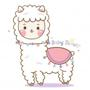

In [1]:
## Initial idea for class Symbol
## Ipython could not display the image on the command shell
## So abandon this approach

import csv
from IPython.display import Image, display
           
class Symbol():
    '''Represent a symbol in the symbol bank, Has display_sym method
    to show the picture of a symbol object in the bank'''

    # Dictionary contains all symbols with their paths
    with open('data/all_symbols.csv','rt') as file:
        sym_reader = csv.reader(file)
        # Dictionary contains all symbols with their picture paths
        sym_bank = {row[0]:row[1] for row in sym_reader}
       
    def __init__(self, symbol = None):
        self.symbol = symbol
        
    def display_sym(self):
        '''Display the picture of a symbol'''
        if self.symbol in Symbol.sym_bank.keys():
            self.path = Symbol.sym_bank[self.symbol]
            display(Image(filename = self.path))
            
    
# Test class Symbol
symbol1 = Symbol('llama')
print(Symbol.sym_bank)
symbol1.display_sym()

In [2]:
## Final approach for class Symbol
import csv
from PIL import Image
           
class Symbol():
    '''Represent a symbol in the symbol bank, Has display_sym method
    to show the picture of a symbol object in the bank'''

    # Dictionary contains all symbols with their paths
    with open('data/all_symbols.csv','rt') as file:
        sym_reader = csv.reader(file)
        # Dictionary contains all symbols with their picture paths
        sym_bank = {row[0]:row[1] for row in sym_reader}
       
    def __init__(self, symbol = None):
        self.symbol = symbol
        
    def display_sym(self):
        '''Display the picture of a symbol'''
        if self.symbol in Symbol.sym_bank.keys():
            self.path = Symbol.sym_bank[self.symbol]
            image = Image.open(self.path)
            image.show()
            
    
# Test class Symbol
symbol1 = Symbol('llama')
print(Symbol.sym_bank)
symbol1.display_sym()

{'apple': 'pics/apple.png', 'cat': 'pics/cat.jpg', 'sushi': 'pics/sushi.png', 'dog': 'pics/dog.png', 'moon': 'pics/moon.png', 'waterfall': 'pics/waterfall.jpg', 'snowflake': 'pics/snowflake.jpg', 'popsicle': 'pics/popsicle.png', 'whale': 'pics/whale.jpg', 'watermelon': 'pics/watermelon.png', 'milk tea': 'pics/tea.jpg', 'coffee': 'pics/coffee.png', 'star': 'pics/star.png', 'rainbow': 'pics/rainbow.jpg', 'chips': 'pics/chips.jpg', 'avocado': 'pics/avocado.png', 'berry': 'pics/berry.jpg', 'mouse': 'pics/mouse.png', 'sun': 'pics/sun.jpg', 'tulip': 'pics/tulip.jpg', 'cupcake': 'pics/cupcake.png', 'cake': 'pics/cake.jpg', 'ice cream': 'pics/icecream.png', 'strawberry': 'pics/strawberry.jpg', 'pear': 'pics/pear.jpg', 'panda': 'pics/panda.png', 'cactus': 'pics/cactus.png', 'nutella': 'pics/nutella.png', 'fox': 'pics/fox.png', 'bunny': 'pics/bunny.png', 'turtle': 'pics/turtle.png', 'dragon': 'pics/dragon.png', 'unicorn': 'pics/unicorn.png', 'llama': 'pics/llama.jpg', 'koala': 'pics/koala.png', 

In [3]:
import csv

class PlayBoard():
    '''Contains all PlayBoard designs and prizes of the ticket'''
    
    # get all ticket designs
    with open('data/ticket1.csv','rt') as file:
        board_reader = csv.reader(file)
        data = [row for row in board_reader]
    
    def __init__(self, design_num = None):
        self.design_num = design_num
            
    def choose_design(self):
        '''Return a list of all symbols in the ticket,
        based on the design number chosen by the player'''
        self.ticket_sym = []
        
        # Ticket 1
        if self.design_num == 1:
            # Ticket 1 data in index 0 of the Playboard.data
            ticket = [PlayBoard.data[row][0] for row in range(len(PlayBoard.data))]
                 
        # Ticket 2
        if self.design_num == 2:
            ticket = [PlayBoard.data[row][2] for row in range(len(PlayBoard.data))]        
        
        
        # Ticket 3
        if self.design_num == 3:
            ticket = [PlayBoard.data[row][4] for row in range(len(PlayBoard.data))]

        # Group data into rows, columns similar to the Playboard1 & Playboard2 design
        j = 0
        while j < 31:
            self.ticket_sym.append(ticket[j:j+4])
            j += 4

        # Add bonus game rows & collumns
        j = 32
        while j < 39:
            self.ticket_sym.append(ticket[j:j+2])
            j += 2
            
        return self.ticket_sym
    
    def get_prize(self, win_set = None):
        '''Return the winning prize for a winning set that matched the symbols
        of a row, or a column, or the diagonals'''
        
        # Define prizes
        self.choose_design()  # Calling choose_design() method for running independently
        row_prizes = [500, 1000, 2000, 250000, 1000, 2000, 10000, 500000]
        col_prizes = [10, 20, 30, 50, 10, 25, 50, 100]
        diag_prizes = [200, 100, 500, 200]
        self.win_prize = 0
        
        # Create a dictionary with prize for each row
        self.row_dict = {tuple(self.ticket_sym[j]):row_prizes[j] for j in range(8)}
        
        # Create a dictionary with prize for each collumn
        self.col = []
        # Playboard 1 - first four rows
        [self.col.append([self.ticket_sym[row][j] for row in range(4)]) for j in range(4)]
        # Playboard 2 - from row 5 to 8
        [self.col.append([self.ticket_sym[row][j] for row in range(4,8)]) for j in range(4)]
        # Add prizes to collumns
        self.col_dict = {tuple(self.col[j]):col_prizes[j] for j in range(8)}
        
        # Create a dictionary with prize for each diagonal
        diag = []
        # Playboard 1
        diag.append([self.ticket_sym[j][j] for j in range(4)])
        diag.append([self.ticket_sym[j][3-j] for j in range(4)])
        # Playboard 2
        diag.append([self.ticket_sym[j][j-4] for j in range(4,8)])
        diag.append([self.ticket_sym[j][7-j] for j in range(4,8)])
        # Add prizes to diagonals
        self.diag_dict = {tuple(diag[j]):diag_prizes[j] for j in range(4)}
        
        # All prizes from rows, columns & diagonals
        self.prize_dict = {**self.row_dict,**self.col_dict,**self.diag_dict}
        
        # Get winning prize for a set of symbols:
        if win_set:
            self.win_set = tuple(win_set)
            # Get prize for the win_set from the prize_dict
            for key in self.prize_dict.keys():
                if key == self.win_set:
                    self.win_prize = self.prize_dict[key]
                    break
        
        return self.win_prize
        

# Test class PlayBoard
#print(PlayBoard.board_data)
board1 = PlayBoard(1)
board1.choose_design()
tick_sym1 = board1.ticket_sym
print('Ticket design 1 symbols:\n',tick_sym1)

board2 = PlayBoard(2)
board2.choose_design()
tick_sym2 = board2.ticket_sym
print('\nTicket design 2 symbols:\n',tick_sym2)

board3 = PlayBoard(3)
board3.choose_design()
tick_sym3 = board3.ticket_sym
print('\nTicket design 3 symbols:\n',tick_sym3)

# Test get_prize method 
set1 = ('apple', 'sushi', 'cat', 'dog')    # Row1
set2 = ('dog', 'coffee', 'panda', 'nutella')    # Column4
set3 = ('apple','popsicle','cupcake','nutella')    # Diagonal1
print('\nPrize of set1:',board1.get_prize(set1))
print('Prize of set2:',board1.get_prize(set2))
print('Prize of set3:',board1.get_prize(set3))

Ticket design 1 symbols:
 [['apple', 'sushi', 'cat', 'dog'], ['moon', 'popsicle', 'watermelon', 'coffee'], ['star', 'avocado', 'cupcake', 'panda'], ['mouse', 'ice cream', 'cactus', 'nutella'], ['fox', 'bunny', 'turtle', 'dragon'], ['unicorn', 'koala', 'bat', 'seahorse'], ['jellyfish', 'pumpkin', 'elephant', 'deer'], ['pear', 'witch', 'sun', 'tulip'], ['harry potter', 'nutella'], ['cat', 'llama'], ['cake', 'dragon'], ['jellyfish', 'milk tea']]

Ticket design 2 symbols:
 [['fox', 'bunny', 'turtle', 'dragon'], ['unicorn', 'koala', 'bat', 'seahorse'], ['jellyfish', 'pumpkin', 'elephant', 'deer'], ['pear', 'witch', 'sun', 'tulip'], ['waterfall', 'snowflake', 'whale', 'milk tea'], ['rainbow', 'chips', 'berry', 'strawberry'], ['narwhal', 'ghost', 'pencil', 'zebra'], ['ice cream', 'watermelon', 'star', 'mouse'], ['elephant', 'popsicle'], ['dragon', 'moon'], ['avocado', 'berry'], ['milk tea', 'cupcake']]

Ticket design 3 symbols:
 [['waterfall', 'snowflake', 'whale', 'milk tea'], ['rainbow', 'c

In [4]:
import random

class BonusBoard(PlayBoard):
    '''Child class of PlayBoard, Bonus prize are random'''
    
    def set_bonus(self):
        '''The 4 bonus prizes will be chosen randomly from a list of prizes from
        $5 up to $5,000'''
        prizes = [5, 10, 25, 50, 100]*4 + [200, 300, 500, 750]*2 + [1000, 2000, 5000]
        self.bonus = [prizes[random.randint(0,len(prizes)-1)] for j in range(4)]
        return self.bonus
    
    def get_prize(self, win_set = None):
        '''Return the winning prize for a winning set that matched the 2 symbols
        of a bonus row'''
        self.bonus_prize = 0
        
        # Get bonus row from ticket
        if self.design_num:
            # Call the parent choose_design() method to get the ticket symbols
            self.choose_design()    
            # Create a dictionary with prize for each bonus row 
            prize_dict = {tuple(self.ticket_sym[j]):self.bonus[i] \
                       for j, i in zip(range(8,12),range(4))}

        # Get winning prize for a set of symbols:            
        if win_set:
            self.win_set = tuple(win_set)
            # Get prize for the win_set from the prize_dict
            for key in prize_dict.keys():
                if key == self.win_set:
                    self.bonus_prize = prize_dict[key]
                    break
        
        return self.bonus_prize

    
# Test class BonusBoard
bon1 = BonusBoard(1)
set4 = ('harry potter', 'nutella')
bon1.set_bonus()
bon1.get_prize(set4)
print('Hidden prizes:',bon1.bonus)
print('Hidden prize for set4:',bon1.bonus_prize)

Hidden prizes: [300, 5, 25, 25]
Hidden prize for set4: 300


In [5]:
import random

class Algorithm():
    '''Store 3 different algorithms to decide the winning chance of a chosen ticket,
    Return the caller symbols based on which algorithm is run'''
    
    def __init__(self, ticket_num = None, ticket_sym = None):
        self.ticket_num = ticket_num
        self.ticket_sym = ticket_sym
        self.excludes = []
        # Initialize caller bank which is all the keys in the symbol bank
        self.call_bank = [key for key in Symbol.sym_bank.keys()]
        # shuffle the call_bank to make it random
        self.call_bank = random.sample(self.call_bank, k = len(self.call_bank))
        
    def get_win_chance(self):
        '''Get the algorithm number to be run with the chosen ticket number
        50% chance will get algorithm1, 40% chance will get algorithm2,
        and 10% will get algorithm3'''
        chance_list = [1, 1, 1, 1, 1, 2, 2, 2, 2, 3]
        
        # Randomly shuffle the ticket numbers from 1 to 10
        tick_num_list = random.sample(range(1,11), k = 10)
        
        # Return the algorithm number to be run with the chosen ticket number
        self.chance = chance_list[tick_num_list.index(self.ticket_num)]
        return self.chance
    
    def algo3(self):
        '''Return the caller bank in complete random after shuffle in __init__,
        no restriction applied, do not exclude any symbols. The player can win
        up to $500,000'''
        return self.call_bank
        
    def algo2(self):
        '''Restrict so that no high prize could be win, this is done by eliminating
        the symbol at postion (row4, column4) and position (row3, column 2)
        on both playboard1 and playboard2 from the caller bank.The player can
        win up to $2,000. Return the caller bank after excluding symbols'''
        try:
            # Symbols to be excluded from the caller bank
            self.excludes = [self.ticket_sym[3][3], self.ticket_sym[7][3], \
                             self.ticket_sym[2][1], self.ticket_sym[6][1]]
            # print(self.excludes)
            
            [self.call_bank.remove(self.excludes[j]) for j in range(2)]
            return self.call_bank
        
        except:
            pass
        
    def algo1(self):
        '''The Player can NOT win. Restrict so that no complete row, column or 
        diagonal could be called. This is done by eliminating one column on each
        playboards, and one symbol on each of the other columns. Then eliminating
        four symbols on each row of the bonus game board. Return the caller bank
        after excluding these symbols'''
        
        try:
            # Select two random columns: one for playboard1 and one for playboard2
            # Only select column 2 to 4 to exclude, make it less obvious to the player
            x, y = tuple(random.sample(range(1,4), k = 3)[:2])
            # Exclude all symbols from these two columns
            self.excludes = [self.ticket_sym[j][x] for j in range(4)] \
                + [self.ticket_sym[j][y] for j in range(4,8)]
            
            # a. Build a list of columns for iteration
            col = []
            # Playboard 1 - first four rows
            [col.append([self.ticket_sym[row][j] for row in range(4)]) for j in range(4)]
            # Playboard 2 - from row 5 to 8
            [col.append([self.ticket_sym[row][j] for row in range(4,8)]) for j in range(4)]
            
            # b. Exclude one symbol on each of the other columns (not column x or column y)
            for j in range(8):
                if j == x or j == y+4:
                    continue
                self.excludes.append(col[j][random.randint(0,3)])
            
            # Exlude one symbol on each of the bonus rows
            self.excludes += [self.ticket_sym[row][random.choice([0,1])] for row in range(8,12)]
            # print(self.excludes)
            
            # Symbols to be excluded from the caller bank, there will be up to 18 symbols 
            # to be excluded, leaving min 29 symbols left for the caller card
            [self.call_bank.remove(self.excludes[j]) for j in range(len(self.excludes))]
            return self.call_bank      
            
        except:
            pass
        
    def get_algo(self):
        '''Chose an algorithm to run for the chosen ticket based on the winning chance
        Return a list of caller symbols'''
        
        # Call get win chance method to decide which algorithm to run
        self.get_win_chance()
        
        # Call coresponding algorithm base on the win_chance
        if self.chance == 1:
            self.algo1()
            
        elif self.chance == 2:
            self.algo2()
            
        else:
            self.algo3()
            
        # the caller symbols are the first 28 symbols from the call_bank
        self.caller_sym = self.call_bank[:28]
        return self.caller_sym
        

# Test class Algorithm
my_algo = Algorithm(6,tick_sym1)
my_algo.get_algo()
print('The algorithm to be used is:',my_algo.chance)
print('Symbol to be excluded from caller card:',my_algo.excludes)
print('\nCaller card symbols:\n',my_algo.caller_sym)


The algorithm to be used is: 2
Symbol to be excluded from caller card: ['nutella', 'tulip', 'avocado', 'pumpkin']

Caller card symbols:
 ['witch', 'dragon', 'coffee', 'pear', 'elephant', 'pencil', 'deer', 'jellyfish', 'strawberry', 'ice cream', 'harry potter', 'rainbow', 'waterfall', 'cat', 'watermelon', 'avocado', 'turtle', 'unicorn', 'seahorse', 'zebra', 'sun', 'popsicle', 'cake', 'whale', 'narwhal', 'cactus', 'berry', 'dog']


In [6]:
class CallerBoard():
    '''Store a list of symbols in caller boards, it has following main methods:
        display_caller() to reveal the caller symbols of the chosen ticket
        get_win_set() to get the winning row, collumn or diagonal of the ticket
        display_final_prizes() to get the total winning amount to the player'''
    
    def __init__(self, BoardObj = None, caller_sym = None):
        self.caller_sym = caller_sym
        self.BoardObj = BoardObj
        self.BoardObj.get_prize() # Call get_prize method to get prize_dict attributes
        self.prize_dict = self.BoardObj.prize_dict  # Shorter the name for easier handling
        self.ticket_sym = self.BoardObj.ticket_sym
        self.design_num = self.BoardObj.design_num
        global menu
        menu = "\nMENU: \
        \n-----------\nTo choose yes, enter: y or yes \
        \nTo choose no, enter: n or no \
        \nTo quit playing, enter: q or quit \
        \nTo show help menu, enter: m or menu \
        \n-----------\n"
        
    def display_caller(self):
        '''Display the 4 symbols on caller card at a time to the player''' 

        # Loop through the caller symbols and reveal to the player
        j = 0
        print('\n-----\nI can reveal four caller symbols to you at a time.')
        print("***NOTE: If you are not sure how a symbol may look like, enter 's' or 'show' to see it.")
        message = '\nWould you like to reveal the caller symbols?\n'
        while True:
            prompt = input(message).lower()
            # Show four symbols at at time
            if prompt in ('y','yes'):
                print('\nHere are your symbols:\n----------')
                for i in range(j, j+4):
                    print(f'Caller Symbol {i+1}:', self.caller_sym[i])
                
                if j < 24:
                    print(f"----------\nThere are {24-j} symbols left to reveal.\n")
                j += 4
                # End loop when all symbols have been revealed
                if j == 28:
                    print('----------\nAll caller symbols have been revealed.')
                    break
                message = '\nWould you like to continue revealing the symbols:\n'
            
            # Show a picture of a symbol to the player
            elif prompt in ('s','show'):
                while True:
                    prompt2 = input("\nEnter the caller symbol number that you want to see its picture.\n")
                    try:
                        x = int(prompt2)
                        if x in range (1, 29):
                            cur_sym = Symbol(self.caller_sym[x-1])
                            cur_sym.display_sym()
                        prompt3 = input("\nDo you want to see the picture of another symbol?:\n").lower()
                        if prompt3 in ('n','no'):
                            break
                        elif prompt3 in ('q', 'quit'):
                            exit()
                        elif prompt3 in ('m','menu'):
                            print(menu)
                        elif prompt3 in ('y','yes'):
                            continue
                        else:
                            print('Invalid entry! Enter "m" or "menu" to see to the help menu.')

                    except:
                        if prompt2.lower() in ('n', 'no'):
                            break
                        elif prompt2.lower() in ('q','quit'):
                            exit(1)
                        elif prompt2.lower() in ('m', 'menu'):
                            print(menu)
                        else:
                            print("\nInvalid entry. Please enter a number from 1 to 28 only. \
                                \nOr enter 'm' or ''menu' to see the help menu")

            # End loop if the player want to stop seeing the symbols
            elif prompt in ('n',"no"):
                break
            
            # End the game if player want to quit
            elif prompt in ('q','quit'):
                exit(1)

            # Display menu
            elif prompt in ('m', 'menu'):
                print(menu.rstrip().rstrip('-') \
                    + "To see a picture of a symbol, enter: s or show\n---------\n")
            
            # Display an error if invalid input from the user
            else:
                print("\nInvalid input. Enter 'y' or 'yes' if you want to continue.\
                    \nEnter 'm' or 'menu' to see the help menu.")
            
    def get_win_set(self):
        '''Return all winning rows, columns or diagonals in a ticket'''
        self.win_bank = []
        
        # Get all rows, collums, diagonals of the tickets from the keys of prize_dict
        self.all_sets = [key for key in self.prize_dict.keys()]
        # looping through all rows on ticket, add winning row, collumn or diag to the win bank
        for j in self.all_sets:
            if set(j) < set(self.caller_sym):
                self.win_bank.append(j)
        
        # Get winning rows for the bonus game, row index is 8 to 11 on ticket_sym 
        for row in range(8, 12):
            if set(self.ticket_sym[row]) < set(self.caller_sym):
                self.win_bank.append(tuple(self.ticket_sym[row]))
        
        return self.win_bank
            
    def display_final_prizes(self):
        '''Display total winning prize from the ticket'''
        # Call get_win_set method to get the win_bank
        self.get_win_set()
        self.total_win = 0
        
        # Get all winning prizes from playboard1 and playboard2
        for win_set in self.win_bank:
            self.total_win += self.BoardObj.get_prize(win_set)           
        
        # Get all winning prizes from the bonus game
        # Create the bonus_board object
        self.bonus_board = BonusBoard(self.design_num)
        self.bonus_board.set_bonus()
        for win_set in self.win_bank:
            self.total_win += self.bonus_board.get_prize(win_set) 
        
        # Reveal hidden prizes to player:
        print('\n-----\nI can reveal the hidden prizes to you.')        
        while True:
            prompt = input('\nWould you like to see the hidden prizes?:\n').lower()
            # Show hidden prize if yes then break out of loop
            if prompt in ('y','yes'):
                print('\nHere are your hidden prizes:\n----------')
                [print(f'Hidden prize {j+1}:', self.bonus_board.bonus[j]) \
                 for j in range(len(self.bonus_board.bonus))]
                print('----------')
                break
                
            # If answer is no, break out of loop
            elif prompt in ('n','no'):
                break
            
            # End the game if user want to quit
            elif prompt in ('q', 'quit'):
                exit(1)

            elif prompt in ('m','menu'):
                print(menu)
            
            # Invalid entry from player, keep looping
            else:
                print("\nInvalid input. Enter 'y' or 'yes' to continue.\
                    \nOr enter 'm' or 'menu' to see the help menu.")
                
        # Let the player claim the winning prizes:
        while True:
            prompt1 = input('\nAre you ready to claim your winning prize?:\n').lower()
            if prompt1 in ('y', 'yes'):
                while True:
                    prompt2 = input('\nHow much did you win?:\n')
                    try:
                        if int(prompt2.strip('$')) == self.total_win:
                            if self.total_win  == 0:
                                print("\n-----\nYou've almost won though! Good luck next time!")
                            else:
                                print(f'\n-----\nFantastic! You have won a total of ${self.total_win}. Congratulations!')
                                print('\nI will send your winning prize tonight, around 2-4 am. \
                                    \nWish you will have an amazing dream tonight!')
                        else:
                            if self.total_win  == 0:
                                print("\n-----\nThat's not what I have though, make sure to double check your ticket.\
                                \nUnfortunately, you did not win! Good luck next time!")
                            else:
                                print(f"\n-----\nThat's not what I have though, make sure to double check your ticket.\
                                \nYou have actually won a total of ${self.total_win}. Congratulations!")
                                print('\nI will send you the winning prize tonight, around 2-4 am. \
                                    \nWish you will have an amazing dream tonight!')
                        break

                    except:
                        print("\nInvalid entry! Please enter the total number of Dollars that you've won.")
                break
            
            elif prompt1 in ('n', 'no'):
                print("\n\nOh, okay. Take your time. Enter 'y' or 'yes' when you are ready. ")
                
            elif prompt1 in ('q','quit'):
                exit(1)
            
            elif prompt1 in ('m','menu'):
                print(menu)     
            
            else:
                print("\nInvalid entry! Enter 'y' or 'yes' to continue.\
                    \nOr enter 'm' or 'menu' to see the help menu.")
                                       
        return self.total_win
        
    
# Tests for class CallerBoard
board1 = PlayBoard(1)
caller1 = my_algo.caller_sym
my_call = CallerBoard(board1, caller1)
print('Ticket design 1 symbols:\n',tick_sym1)
print('\nCaller symbols:\n', caller1)
my_call.get_win_set()
print('\nAll keys in prize_dict:\n', my_call.all_sets)
print('\nThis is all win sets:',my_call.get_win_set())

Ticket design 1 symbols:
 [['apple', 'sushi', 'cat', 'dog'], ['moon', 'popsicle', 'watermelon', 'coffee'], ['star', 'avocado', 'cupcake', 'panda'], ['mouse', 'ice cream', 'cactus', 'nutella'], ['fox', 'bunny', 'turtle', 'dragon'], ['unicorn', 'koala', 'bat', 'seahorse'], ['jellyfish', 'pumpkin', 'elephant', 'deer'], ['pear', 'witch', 'sun', 'tulip'], ['harry potter', 'nutella'], ['cat', 'llama'], ['cake', 'dragon'], ['jellyfish', 'milk tea']]

Caller symbols:
 ['witch', 'dragon', 'coffee', 'pear', 'elephant', 'pencil', 'deer', 'jellyfish', 'strawberry', 'ice cream', 'harry potter', 'rainbow', 'waterfall', 'cat', 'watermelon', 'avocado', 'turtle', 'unicorn', 'seahorse', 'zebra', 'sun', 'popsicle', 'cake', 'whale', 'narwhal', 'cactus', 'berry', 'dog']

All keys in prize_dict:
 [('apple', 'sushi', 'cat', 'dog'), ('moon', 'popsicle', 'watermelon', 'coffee'), ('star', 'avocado', 'cupcake', 'panda'), ('mouse', 'ice cream', 'cactus', 'nutella'), ('fox', 'bunny', 'turtle', 'dragon'), ('unicorn

In [7]:
# Test for display_caller method with user input
my_call.display_caller()


-----
I can reveal four caller symbols to you at a time.
***NOTE: If you are not sure how a symbol may look like, enter 's' or 'show' to see it.

Would you like to reveal the caller symbols?
y

Here are your symbols:
----------
Caller Symbol 1: witch
Caller Symbol 2: dragon
Caller Symbol 3: coffee
Caller Symbol 4: pear
----------
There are 24 symbols left to reveal.


Would you like to continue revealing the symbols:
m

MENU:         
-----------
To choose yes, enter: y or yes         
To choose no, enter: n or no         
To quit playing, enter: q or quit         
To show help menu, enter: m or menu         
To see a picture of a symbol, enter: s or show
---------


Would you like to continue revealing the symbols:
s

Enter the caller symbol number that you want to see its picture.
4

Do you want to see the picture of another symbol?:
y

Enter the caller symbol number that you want to see its picture.
5

Do you want to see the picture of another symbol?:
n

Would you like to continue

In [8]:
# Tests for display_final_prizes method
my_call.display_final_prizes()
#print('\nHidden prizes:', my_call.bonus_board.bonus)
print('\nTotal amount win:', my_call.total_win)


-----
I can reveal the hidden prizes to you.

Would you like to see the hidden prizes?:
y

Here are your hidden prizes:
----------
Hidden prize 1: 10
Hidden prize 2: 200
Hidden prize 3: 5
Hidden prize 4: 50
----------

Are you ready to claim your winning prize?:
m

MENU:         
-----------
To choose yes, enter: y or yes         
To choose no, enter: n or no         
To quit playing, enter: q or quit         
To show help menu, enter: m or menu         
-----------


Are you ready to claim your winning prize?:
y

How much did you win?:
70

-----
That's not what I have though, make sure to double check your ticket.                                
You have actually won a total of $5. Congratulations!

I will send you the winning prize tonight, around 2-4 am.                                     
Wish you will have an amazing dream tonight!

Total amount win: 5


In [9]:
from PIL import Image

class MainGame():
    '''Game navigation class. Let the user select a ticket design and ticket number
    to play. Run the algorithm to decide the winning chance of the ticket.
    Display the ticket to the user and the caller symbols. Let the user claim
    and check the final winning prizes.'''
    
    def __init__(self):
        # Set Default values
        self.design_num = 1
        self.ticket_num = 1 
        global menu
        menu = "\nMENU: \
        \n-----------\nTo choose yes, enter: y or yes \
        \nTo choose no, enter: n or no \
        \nTo quit playing, enter: q or quit \
        \nTo show help menu, enter: m or menu \
        \n-----------\n"  
    
    def choose_ticket(self):
        '''Let the user enter a ticket design and a ticket number'''
        print("\n**************\nKWAII LOTTERY\n**************\n")
        print('Welcome to the Kwaii Lottery game. Good luck! I wish you find your treasure today.')        
        print('\nPlease review the help menu of the game for navigation.\n\n', menu)
        
        # Prompt if the player want to buy a ticket
        while True:
            prompt1 = input('\nWould you like to buy a ticket for $5?:\n').lower()
            if prompt1 in ("y","yes"):
                break
            elif prompt1 in ("n", "no", 'q', "quit"):
                print('\nOh, okay. Come back when you want to play then.')
                exit(1)
            elif prompt1 in ('m',"menu"):
                print(menu)
            else:
                print("\nInvalid entry! Type 'm' or 'menu' to see the help menu.")
                
        # Prompt for what ticket design the player want to play with
        print("\nI have three different ticket designs, from 1 to 3")
        while True:
            prompt2 = input('\nWhich design do you want to play?:\n')
            try:
                if int(prompt2) in (1, 2, 3):
                    self.design_num = int(prompt2)
                    break
                else:
                    print("\nSorry, I only have 3 ticket designs from 1 to 3 though.")
            
            except:
                if prompt2.lower() in ("q","quit"):
                    exit(1)
                elif prompt2 in ('m',"menu"):
                    print(menu)
                else:
                    print("\nInvalid entry! Please only enter a number from 1 to 3.\
                    \nEnter 'm' or 'menu' to see the help menu.")
        
        # Prompt for what ticket number the playter want to buy
        print("\n-----\nAwesome! I like that design. I wish it will bring you good luck.")
        print("\nI have ten different ticket numbers from 1 to 10.")
        while True:
            prompt3 = input('\nWhich ticket number do you want to buy?:\n')
            try:
                if int(prompt3) in range(1,11):
                    self.ticket_num = int(prompt3)
                    break
                else:
                    print("\nSorry, I only have 10 ticket numbers from 1 to 10.")
            except:
                if prompt3.lower() in ("q","quit"):
                    exit(1)
                elif prompt3 in ('m',"menu"):
                    print(menu)
                else:
                    print("\nInvalid entry! Please only enter a number from 1 to 10.\
                    \nEnter 'm' or 'menu' to see the help menu.")
        
    def display_ticket(self):
        '''Showing the ticket picture'''     
        # Path of the ticket design chosen:
        if self.design_num == 1:
            self.path = "pics/ticket1.png"
        if self.design_num == 2:
            self.path = "pics/ticket2.png"
        if self.design_num == 3:
            self.path = "pics/ticket3.png"
        
        # Display the picture
        image = Image.open(self.path)
        image.show()
        print('\n***************')
        print('\nYOUR TICKET IS SHOWN IN A SEPARATE WINDOW \
            \nDRAW ON IT OR SCRATCH THE CALLER SYMBOLS OUT TO KEEP TRACK OF THEM!\n')
        print('***************\n')
        
        # Give the player some time to look at the ticket
        while True:
            prompt = input("Enter 'y' or 'yes' when you're ready to reveal the caller symbols:\n").lower()
            if prompt in ('y','yes'):
                break
            elif prompt in ('q','quit'):
                exit(1)
            elif prompt in ('m',"menu"):
                print(menu)
            elif prompt in ('n', 'no'):
                print('Oh, okay. Take your time')
            else:
                print("\nInvalid entry! Enter 'm' or 'menu' to see the help menu.")

    def play(self):
        '''Play the game from start to end'''
        # Start the game
        self.choose_ticket()
        self.display_ticket()
        # Get PlayBoard
        play_board = PlayBoard(self.design_num)
        self.ticket_sym = play_board.choose_design()
        # Get Algorithm
        my_algo = Algorithm(self.ticket_num, self.ticket_sym)
        self.caller_sym = my_algo.get_algo()
        # Display CallerBoard
        my_call = CallerBoard(play_board, self.caller_sym)
        my_call.display_caller()
        my_call.display_final_prizes()
        my_win_set = my_call.get_win_set()
        #print(self.caller_sym)
        if my_win_set:
            print('\nThese are the winning sets of your ticket:', my_win_set)
        exit(1)


# VII. Play the game
my_game = MainGame()
my_game.play()


**************
KWAII LOTTERY
**************

Welcome to the Kwaii Lottery game. Good luck! I wish you find your treasure today.

Please review the help menu of the game for navigation.

 
MENU:         
-----------
To choose yes, enter: y or yes         
To choose no, enter: n or no         
To quit playing, enter: q or quit         
To show help menu, enter: m or menu         
-----------


Would you like to buy a ticket for $5?:
m

MENU:         
-----------
To choose yes, enter: y or yes         
To choose no, enter: n or no         
To quit playing, enter: q or quit         
To show help menu, enter: m or menu         
-----------


Would you like to buy a ticket for $5?:
n

Oh, okay. Come back when you want to play then.

Would you like to buy a ticket for $5?:
y

I have three different ticket designs, from 1 to 3

Which design do you want to play?:
1

-----
Awesome! I like that design. I wish it will bring you good luck.

I have ten different ticket numbers from 1 to 10.

Which 

In [10]:
print(my_game.caller_sym)

['unicorn', 'strawberry', 'watermelon', 'mouse', 'fox', 'dog', 'llama', 'sushi', 'avocado', 'dragon', 'chips', 'pumpkin', 'cat', 'jellyfish', 'apple', 'turtle', 'zebra', 'narwhal', 'pear', 'star', 'moon', 'harry potter', 'coffee', 'witch', 'bunny', 'pencil', 'cake', 'whale']
